# Scripts de PyPlot para hacer figuras chingonas para poster

Primero, vamos a intentarlo con un experimento que tenga una actividad notoria. Aquí cargamos un archivo que contiene los datos de un experimento con actividad epiléptica. La región CA aparece muy activa varias veces en las mediciones del potencial de campo local, LFP de ahora en adelante.

In [1]:
using PyPlot

In [2]:
function ListaPixelesdeLinea(x::Array, y::Array)
    #obtener una lista de pixeles/electrodos a lo largo de una linea con dos endpoints enteros.
    #Se ponen las dos coordenadas x en un arreglo y las dos y en otro-
    xuno, xdos=x[1], x[2]
    yuno, ydos=y[1],y[2]
    longitud=abs(xuno-xdos)
    m=(ydos-yuno)/(xdos-xuno)
    xresult=collect(xuno:xdos) #asumimos que el xdos es el grande!
    yresult=zeros(Int, longitud+1)
    for j in 1:longitud+1
        yresult[j]=round(Int,yuno+(j-1)*m)
    end
    return (xresult,yresult)
end

ListaPixelesdeLinea (generic function with 1 method)

In [3]:
puntox=[44,48,52,54,58, 63]
puntoy=[38,42,45,47,50, 54]
puntoy=puntoy+3
puntol=["F","E", "D", "C", "B","A"];
primax=[32, 32, 32, 32, 32, 32]
primay=[43,47,51,55,59,63]
primal=["F'","E'", "D'", "C'", "B'","A'"];

In [8]:
muchasx,muchasy=ListaPixelesdeLinea([44,63],[38,28])
size(muchasx)

(20,)

In [9]:
dobleprimax=[44,48,52,54,58,62]
dobleprimay=[38,36,34,32,30,28]
dobleprimal=["F''","E''", "D''", "C''", "B''","A''"];

In [104]:
t=850
EjemploLFP=readdlm("GarbageCollector/LFP_forPictures-$t.dat")

64x64 Array{Float64,2}:
   0.0      -24.1699    -4.02832  …    0.0       18.1274   -30.2124 
 -12.085     -4.02832   -2.01416      16.1133   -14.0991   -10.0708 
 -24.1699   -32.2266   -12.085         8.05664   16.1133    10.0708 
  -8.05664    6.04248  -18.1274        2.01416   12.085      0.0    
  -2.01416   -6.04248   -6.04248      38.269    -26.1841    12.085  
  10.0708   -38.269    -26.1841   …    8.05664  -14.0991     2.01416
   4.02832  -28.1982    -2.01416     -18.1274   -18.1274    12.085  
 -26.1841   -22.1558   -10.0708       14.0991     0.0       10.0708 
   2.01416  -10.0708   -28.1982        8.05664   14.0991    -2.01416
   4.02832  -10.0708   -20.1416       18.1274   -12.085     -8.05664
  -6.04248   12.085    -16.1133   …   -8.05664    2.01416   -2.01416
  14.0991     0.0      -10.0708       10.0708    10.0708     4.02832
  12.085    -14.0991    10.0708      -20.1416   -14.0991     8.05664
   ⋮                              ⋱                                 
 -40.2832 

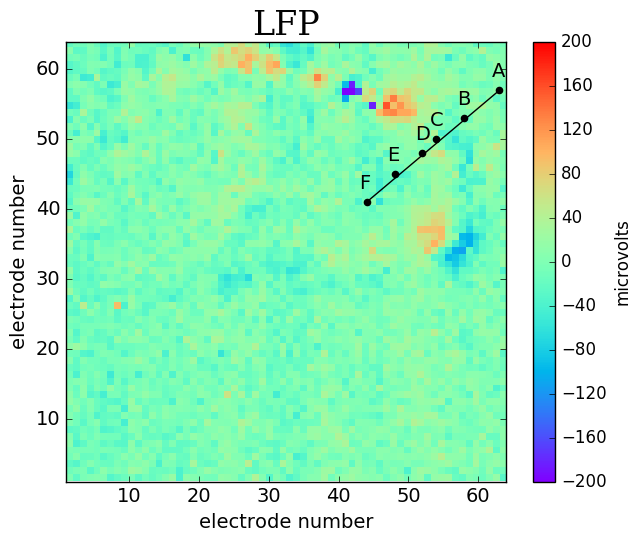

In [105]:
ion()
figure(figsize=(7.0,5.5))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>24)

title("LFP", fontdict=font1)
limites=200
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)


for punto in 1:6
   annotate(puntol[punto], (puntox[punto], puntoy[punto]), xytext=(-5,10), textcoords="offset points", fontsize=14)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(EjemploLFP, 
interpolation="nearest", cmap="rainbow", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
tick_params(axis="both", labelsize=14)

scatter(puntox,puntoy, marker="o", s=20, c="black")

#scatter(primax,primay, marker="d", s=20, c="grey")
#scatter(dobleprimax,dobleprimay, marker="s", s=20, c="grey")


plot([44, 63], [41, 57], "k-")

cbx=colorbar(imagen, fraction=0.045) 
cbx[:set_label]("microvolts")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

savefig("LFP_Recorded_With_Electrodes-$t.svg", dpi=90)

In [87]:
t=550
EjemploCSD=readdlm("GarbageCollector/CSD_forPictures-$t.dat");

In [88]:
EjemploModificado=map(x->abs(x)>2.0?x:0,EjemploCSD);

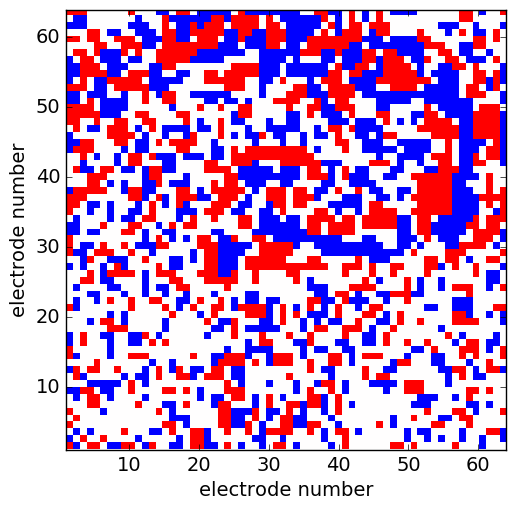

false

In [83]:
PyPlot.ion()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)

limites=1
seg=round(t/7022, 4)
titulo="$seg s"
figure(figsize=(7.0, 5.5))
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)
#tick_params(labelbottom="off", labelleft="off")
otraimagen=imshow(EjemploModificado, cmap="bwr", interpolation="nearest", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
#cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True",fraction=0.045 )
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)
tick_params(axis="both", labelsize=14)
#contour(0:63, 0:63, CSDPlanchada[:,:,t], levels=[-1,1])


xlabel("electrode number", fontsize=14)

ylabel("electrode number", fontsize=14)


#title("CSD", fontdict=font1)

savefig("CSD-Neg-Pos-$t.svg", dpi=90)

#tight_layout()

PyPlot.close_queued_figs()

In [97]:
EjemploPositivo=map(x->x>2.0?x:0,EjemploModificado);

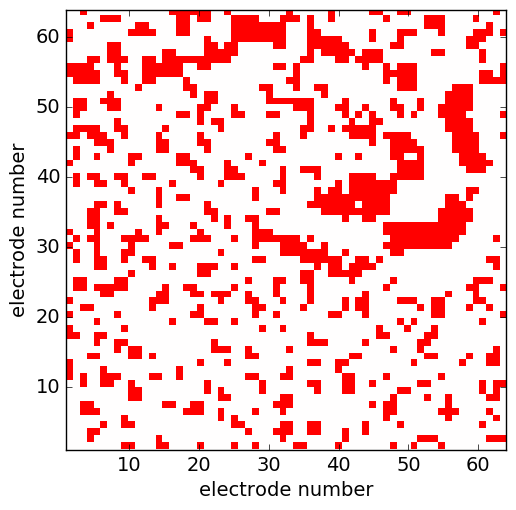

false

In [98]:
PyPlot.ion()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)

limites=1
seg=round(t/7022, 4)
titulo="$seg s"
figure(figsize=(7.0, 5.5))
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)
#tick_params(labelbottom="off", labelleft="off")
otraimagen=imshow(EjemploPositivo, cmap="bwr", interpolation="nearest", origin="lower", vmin=-limites, vmax=limites, extent=[1,64,1,64])
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
#cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True",fraction=0.045 )
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)
tick_params(axis="both", labelsize=14)
#contour(0:63, 0:63, CSDPlanchada[:,:,t], levels=[-1,1])


xlabel("electrode number", fontsize=14)

ylabel("electrode number", fontsize=14)


#title("CSD", fontdict=font1)

savefig("CSD-Positivo-$t.svg", dpi=90)

#tight_layout()

PyPlot.close_queued_figs()

In [66]:
matplotlib[:rcParams][:"svg.image_noscale"]=false

false

In [25]:
ComponentesEtiquetados=readdlm("GarbageCollector/CompNeg-850.dat");

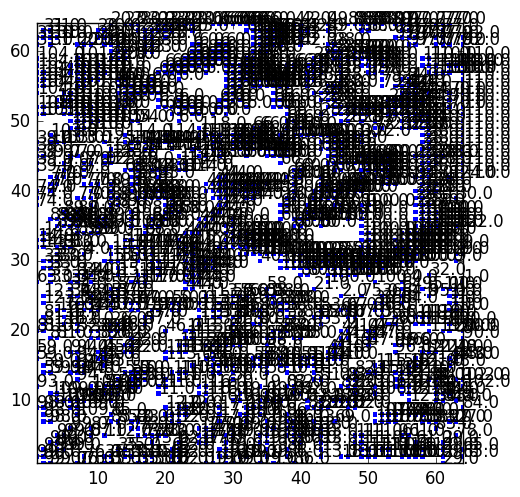

In [38]:
xxpos=ComponentesEtiquetados[:,1]
yypos=ComponentesEtiquetados[:,2]
gordo=ComponentesEtiquetados[:,3]
etiqueta=ComponentesEtiquetados[:,4]
figure(figsize=(5.5, 5.5))
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)

scatter(yypos, xxpos, s=10.0, marker="s", edgecolors="none")
for j=1:length(etiqueta)
    annotate(etiqueta[j], (yypos[j],xxpos[j]))
end

In [11]:
CascadaLFP=readdlm("GarbageCollector/LFP_spaciotemporal_01.dat");
CascadaLFP=transpose(CascadaLFP)

20x1402 Array{Float64,2}:
   8.05664   12.085     -4.02832  …  -14.0991   -14.0991    16.1133 
   6.04248   14.0991     4.02832      16.1133    12.085     -4.02832
  40.2832     2.01416  -14.0991      -16.1133    10.0708   -14.0991 
  24.1699    12.085     24.1699        0.0      -18.1274    20.1416 
  12.085     24.1699    -2.01416     -18.1274     2.01416    2.01416
  16.1133     0.0      -22.1558   …  -14.0991     0.0       14.0991 
  16.1133    12.085     12.085        18.1274    -2.01416   32.2266 
  -6.04248   14.0991    14.0991       22.1558   -14.0991    -6.04248
   6.04248  -14.0991    28.1982      -10.0708    18.1274   -20.1416 
  -2.01416   -6.04248  -12.085        -2.01416    8.05664   -2.01416
  -2.01416    8.05664   24.1699   …   14.0991     0.0      -10.0708 
  14.0991   -16.1133   -22.1558      -22.1558   -38.269    -40.2832 
 -16.1133   -22.1558     8.05664      -2.01416  -46.3257   -24.1699 
  24.1699   -24.1699    -4.02832       8.05664  -30.2124   -56.3965 
   6.042

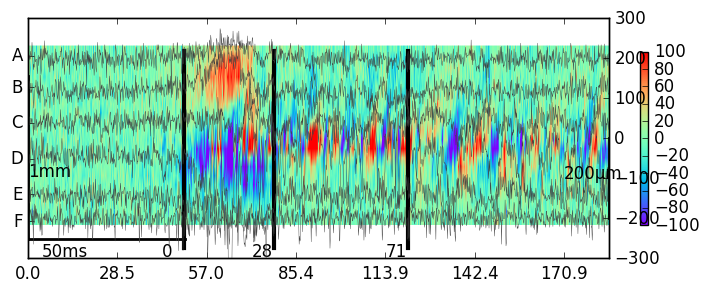

In [15]:
limites=100
fag, gaf=subplots(figsize=(8,3))
#The density plot
gaf[:set_xlim](1,1300)
gaf[:set_ylim](19.5,0)
imagen=gaf[:imshow](CascadaLFP, cmap="rainbow", vmin=-limites, vmax=limites)
tiempoestampas=gaf[:axes][:get_xticks]()
gaf[:plot]([0,351],[21,21], "k-", lw=2)
gaf[:annotate]("50ms", (30.5,23))
gaf[:plot]([0,0],[21,2.73], "k-", lw=2)
gaf[:annotate]("1mm", (0,14))

#Some vertical lines
gaf[:plot]([350,350],[22,0], "k-", lw=3)
gaf[:plot]([550,550],[22,0], "k-", lw=3)
gaf[:plot]([850,850],[22,0], "k-", lw=3)

gaf[:annotate]("0", (300,23))
gaf[:annotate]("28", (500,23))
gaf[:annotate]("71", (800,23))


#adjust aspcet ratioo
gaf[:axes][:set_aspect](20)
map!(x->round(x/7.0224,1), tiempoestampas)
gaf[:axes][:set_xticklabels](tiempoestampas)
gaf[:set_yticks]([19,16,12,8,4,0.5])
gaf[:set_yticklabels](puntol)


#colorbar
cbx=colorbar(imagen, fraction=0.014)

#the traces over the plot
ga2 = gaf[:twinx]()
ga2[:set_ylim](-300,300)

ga2[:plot](1:1300, vec(CascadaLFP[19,1:1300])-200, "-", linewidth=0.3, color="0.25")
ga2[:plot](1:1300, vec(CascadaLFP[16,1:1300])-140, "-", linewidth=0.3, color="0.25")
ga2[:plot](1:1300, vec(CascadaLFP[12,1:1300])-40, "-", linewidth=0.3 , color="0.25")
ga2[:plot](1:1300, vec(CascadaLFP[8,1:1300])+40, "-", linewidth=0.3, color="0.25")
ga2[:plot](1:1300, vec(CascadaLFP[4,1:1300])+120, "-", linewidth=0.3, color="0.25")
ga2[:plot](1:1300, vec(CascadaLFP[1,1:1300])+200, "-", linewidth=0.3,color="0.25")
ga2[:plot]([1300,1300],[-200,0], "k-", lw=2)
ga2[:annotate]("200µm", (1200,-100))


ga2[:set_xlim](1,1300)
#ga2[:set_ylim](-300,300)

savefig("LFP_timespace01.png", dpi=90)

In [16]:
#savefig("LFPRainbow-AF_timespaceTest01.svg", dpi=90)
gaf=0
fag=0
tiempoestampas=0
profundidadestampas=0
close()

In [17]:
CascadaCSD=readdlm("GarbageCollector/CSD-4AP-Selecto_planchado_spaciotemporal_01.dat");
CascadaCSD=transpose(CascadaCSD)

20x1402 Array{Float64,2}:
   8.05664   12.085     -4.02832  …  -14.0991   -14.0991    16.1133 
   6.04248   14.0991     4.02832      16.1133    12.085     -4.02832
  40.2832     2.01416  -14.0991      -16.1133    10.0708   -14.0991 
  24.1699    12.085     24.1699        0.0      -18.1274    20.1416 
  12.085     24.1699    -2.01416     -18.1274     2.01416    2.01416
  16.1133     0.0      -22.1558   …  -14.0991     0.0       14.0991 
  16.1133    12.085     12.085        18.1274    -2.01416   32.2266 
  -6.04248   14.0991    14.0991       22.1558   -14.0991    -6.04248
   6.04248  -14.0991    28.1982      -10.0708    18.1274   -20.1416 
  -2.01416   -6.04248  -12.085        -2.01416    8.05664   -2.01416
  -2.01416    8.05664   24.1699   …   14.0991     0.0      -10.0708 
  14.0991   -16.1133   -22.1558      -22.1558   -38.269    -40.2832 
 -16.1133   -22.1558     8.05664      -2.01416  -46.3257   -24.1699 
  24.1699   -24.1699    -4.02832       8.05664  -30.2124   -56.3965 
   6.042

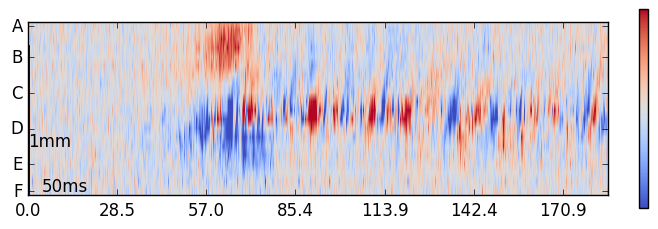

In [21]:
limites=100
figure(figsize=(8,3))
xlim(1,1300)
ylim(19.5,0)
picts=imshow(CascadaCSD, cmap="coolwarm",vmin=-limites, vmax=limites)
tiempoestampas=axes()[:get_xticks]()
map!(x->round(x/7.0224,1), tiempoestampas)
axes()[:set_xticklabels](tiempoestampas)
yticks([19,16,12,8,4,0.5])
axes()[:get_yticks]()
axes()[:set_yticklabels](puntol)


axes()[:set_aspect](20)

tick_params(axis="off", labelsize=14)

plot([0,351],[21,21], "k-", lw=2)
annotate("50ms", (30.5,19))
plot([0,0],[21,2.73], "k-", lw=2)
annotate("1mm", (0,14))
cb=colorbar(picts, ticks=[-150, +150], use_gridspec="True",fraction=0.016 )

savefig("CSD-AF_timespaceTest01.svg", dpi=90)


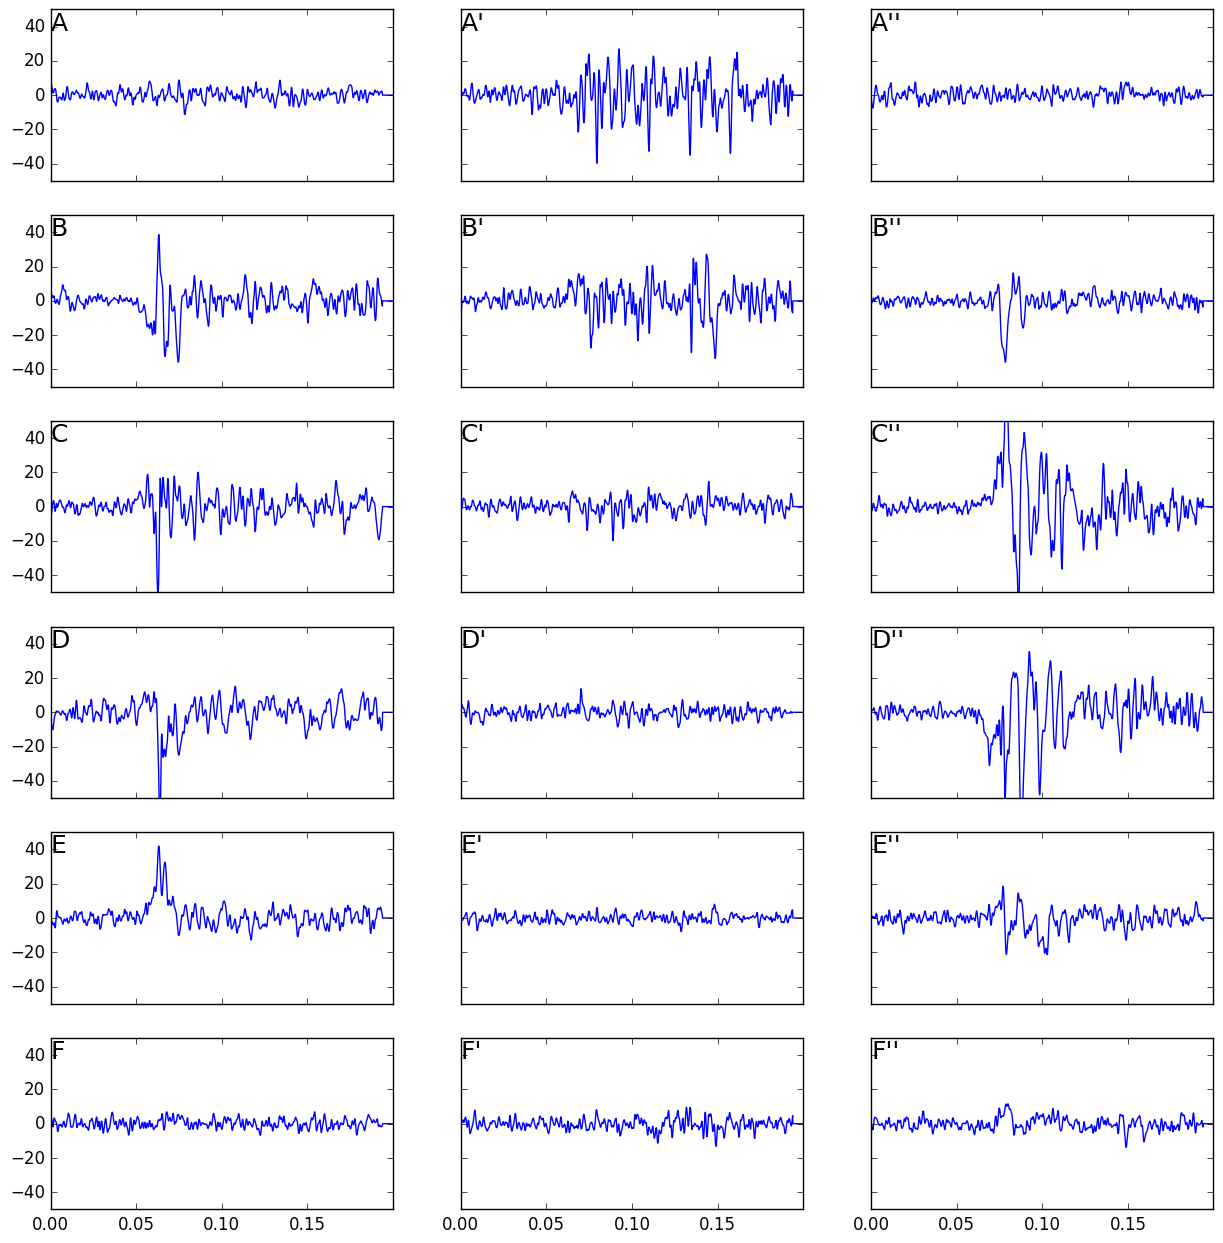

In [52]:
tiempo=1:tmax
t=700


farofa, lista=subplots(6,3, sharex=true, sharey=true, figsize=(15,6*2.5), frameon="false")

for j=1:6
    PyPlot.xlim(1/7022,tmax/7022)
    PyPlot.ylim(-50,50)
    lista[j,1][:plot](tiempo/7022,vec(CSDPlanchada[puntoy[7-j],puntox[7-j],tiempo]))
    lista[j,1][:annotate](puntol[7-j],xy=(0.0,38), annotation_clip=false, fontsize=18)
    
    lista[j,2][:plot](tiempo/7022,vec(CSDPlanchada[primay[7-j],primax[7-j],tiempo]))
    lista[j,2][:annotate](primal[7-j],xy=(0.00,38), annotation_clip=false, fontsize=18)
    
    lista[j,3][:plot](tiempo/7022,vec(CSDPlanchada[dobleprimay[7-j],dobleprimax[7-j],tiempo]))
    lista[j,3][:annotate](dobleprimal[7-j],xy=(0.0,38), annotation_clip=false, fontsize=18)
end

savefig("CSD_A-F_yOtros_Points_01.svg",dpi=90)

In [45]:
function vecindad8(punto::Array)
    j=punto[1]
    k=punto[2]
    result=Set{Array{Int64,1}}()
    push!(result, [j-1,k-1])
    push!(result, [j-1,k])
    push!(result, [j-1,k+1])
    push!(result, [j,k-1])
    push!(result, [j,k+1])
    push!(result, [j+1,k-1])
    push!(result, [j+1,k])
    push!(result, [j+1,k+1])
    return result
end

function DropPeques(data)
    #solo funciona con data de dos indices.
    renglones,colus=size(data)
    prom=mean(abs(data[3]))
    result=zeros(1,colus)
    for k=1:renglones
        if abs(data[k,3])>prom
            result=vcat(result,data[k,:])
        end
    end
    return result
end

DropPeques (generic function with 1 method)

In [46]:
function ObtenComponentesYEscribe(Datos::Array, tini=1, tfini=tmax, epsilon=1.0)
    
 for t=tini:tfini
    #iniciar variables vacias
    ActividadNegativa=Array{Int16}[]
    ActividadPositiva=Array{Int16}[]
    SpikeCountPositivo=zeros(64,64)
    SpikeCountNegativo=zeros(64,64)
    #Todos
    for j=1:64, k=1:64
            if(Datos[j,k,t]<-epsilon)     
            push!(ActividadNegativa, [j, k])
            SpikeCountNegativo[j,k]+=1
                elseif(Datos[j,k,t]>epsilon)
            push!(ActividadPositiva, [j, k])
            SpikeCountPositivo[j,k]+=1
        end             
    end

    #Simple pass method
    listaneg=copy(ActividadNegativa)
    listapos=copy(ActividadPositiva)
    componentesneg=Set{Any}()
    componentespos=Set{Any}()
    #Primero lo negativo (pozos)
    while(length(listaneg)!=0)
        x=pop!(listaneg) #arranca el ULTIMO elemento de la lista
        listaprofundeza=Array{Int64}[]
        componentecurlab=Array{Int64}[]
        push!(listaprofundeza, x) #Pone elementos al FINAL de la lista
        push!(componentecurlab, x)    
        profundidad=0
        while ((length(listaprofundeza)!=0) && profundidad<100)
            y=pop!(listaprofundeza)
            for v in vecindad8(y)
                if in(v, listaneg)
             #   
                        deleteat!(listaneg, indexin(Any[v], listaneg))
                    push!(listaprofundeza, v)
                    profundidad+=1
                    push!(componentecurlab, v)
                end
            end
        end
    # println("Para ", x, "la profundidad fue ", profundidad)
        
        push!(componentesneg, componentecurlab)
    end


    centrosdemasaneg=[[0 0 0];]
    for p in componentesneg
        masa=0.00
        x=0.00
        y=0.00
        for q in p
            j=q[1]
            k=q[2]
                masalocal=Datos[j,k,t]
            masa+=masalocal
            x+=k*masalocal
            y+=j*masalocal
        end
        x/=masa
        y/=masa
        A=[x y masa]
        centrosdemasaneg=vcat(centrosdemasaneg, A)
    end
    centrosdemasaneg=centrosdemasaneg[2:end,:]
    zacatlan="GarbageCollector/CMPozos-$t.dat"
    writedlm(zacatlan, centrosdemasaneg)
    ##### Ahora lo posittivo (fuentes)
    while(length(listapos)!=0)
        x=pop!(listapos) #arranca el ULTIMO elemento de la lista
        listaprofundeza=Array{Int64}[]
        componentecurlab=Array{Int64}[]
        push!(listaprofundeza, x) #Pone elementos al FINAL de la lista
        push!(componentecurlab, x)    
        profundidad=0
        while ((length(listaprofundeza)!=0) && profundidad<100)
            y=pop!(listaprofundeza)
            for v in vecindad8(y)
                if in(v, listapos)
             #   
                        deleteat!(listapos, indexin(Any[v], listapos))
                    push!(listaprofundeza, v)
                    profundidad+=1
                    push!(componentecurlab, v)
                end
            end
        end
    # println("Para ", x, "la profundidad fue ", profundidad)
        
        push!(componentespos, componentecurlab)
    end


    centrosdemasapos=[[0 0 0];]
    for p in componentespos
        masa=0.00
        x=0.00
        y=0.00
        for q in p
            j=q[1]
            k=q[2]
                masalocal=Datos[j,k,t]
            masa+=masalocal
            x+=k*masalocal
            y+=j*masalocal
        end
        x/=masa
        y/=masa
        A=[x y masa]
        centrosdemasapos=vcat(centrosdemasapos, A)
    end
    centrosdemasapos=centrosdemasapos[2:end,:]
    zacatlan="GarbageCollector/CMFuentes-$t.dat"
    writedlm(zacatlan, centrosdemasapos)
end
    return curlab
end

ObtenComponentesYEscribe (generic function with 4 methods)

In [47]:
size(CSDPlanchada)

(64,64,1402)

In [48]:
ObtenComponentesYEscribe(CSDPlanchada, 1, 1402)

LoadError: LoadError: UndefVarError: curlab not defined
while loading In[48], in expression starting on line 1

In [57]:
t=550
EjemploCentrosCSDPos=readdlm("GarbageCollector/CentrosDeMasaParaPoster/CMFuentes-550.dat")
EjemploCentrosCSDPos=DropPeques(EjemploCentrosCSDPos)
xxpos=EjemploCentrosCSDPos[:,1]
yypos=EjemploCentrosCSDPos[:,2]
valorpos=EjemploCentrosCSDPos[:,3]
EjemploCentrosCSDNeg=readdlm("GarbageCollector/CentrosDeMasaParaPoster/CMPozos-550.dat")
EjemploCentrosCSDNeg=DropPeques(EjemploCentrosCSDNeg)
xxneg=EjemploCentrosCSDNeg[:,1]
yyneg=EjemploCentrosCSDNeg[:,2]
valorneg=EjemploCentrosCSDNeg[:,3];
CSDEjemplo=CSDPlanchada[:,:,550];

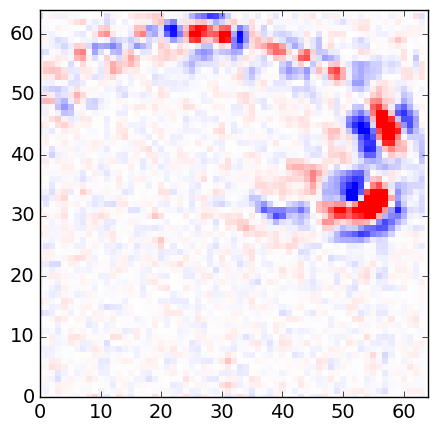

false

In [63]:
PyPlot.ion()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)
seg=round(t/7022, 4)
titulo="$seg s"
figure(figsize=(5,5))
PyPlot.xlim(0,64)
PyPlot.ylim(0,64)

otraimagen=imshow(CSDEjemplo, cmap="bwr", origin="lower", vmin=-50, vmax=50, interpolation="none")
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
#cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True")
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)

#scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
#scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="g", edgecolors="none")
#scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="yellow", edgecolors="black")
#scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="green", edgecolors="black")

tick_params(axis="both", labelsize=14)

#title(titulo, fontdict=font1)
 #tight_layout()
savefig("CSDParaDisjoint-550.svg", dpi=90)
PyPlot.close_queued_figs()

In [64]:
writedlm("CSDForLineArtAbove-550.dat", CSDEjemplo)

In [56]:
PyPlot.ioff()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20)


for t=300:100:900

seg=round((t-300)/7.022, 1)
titulo="$seg ms"
figure(figsize=(6,5.5))
PyPlot.xlim(0,64)
PyPlot.ylim(0,64)
#tick_params(labelbottom="off", labelleft="off")
otraimagen=imshow(CSDPlanchada[:,:,t], cmap="bwr", interpolation="spline16", origin="lower", vmin=-50, vmax=50)
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True",fraction=0.045 )
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)
tick_params(axis="both", labelsize=14)
#contour(0:63, 0:63, CSDPlanchada[:,:,t], levels=[-1,1])


annotate("Sink",
    xy=[1.07;-0.09],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14.0,
    ha="left",
    va="bottom")

annotate("Source",
    xy=[1.05;0.98],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=14,
    ha="left",
   va="bottom")

xlabel("electrode number", fontsize=14)

ylabel("electrode number", fontsize=14)

    title(titulo, fontdict=font1)

    savefig("CSDPlanchadaSinLabels-$t.svg", dpi=90)

end
#tight_layout()

PyPlot.close_queued_figs()